In [5]:
import pandas as pa
import matplotlib.pyplot as py
import seaborn as sns
df = pa.read_csv("house_price.csv")
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [11]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [17]:
df.shape

(13200, 7)

In [21]:
df.price_per_sqft.isnull().sum()

0

C:\Users\Windows 11\AppData\Local\Temp\ipykernel_17624\2792960981.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'],bins = 100,kde = True)


<Axes: xlabel='price_per_sqft', ylabel='Density'>

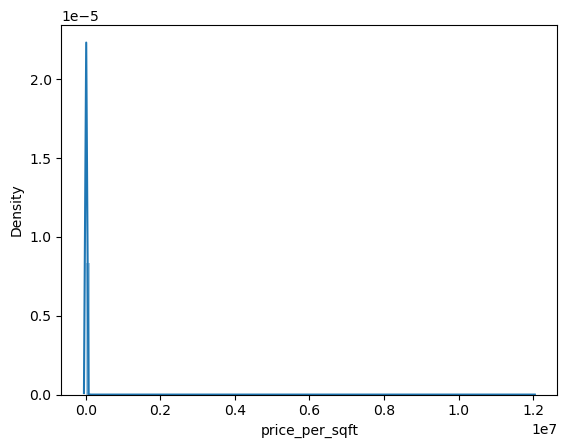

In [73]:
sns.distplot(df['price_per_sqft'],bins = 100,kde = True)

<Axes: xlabel='pps3'>

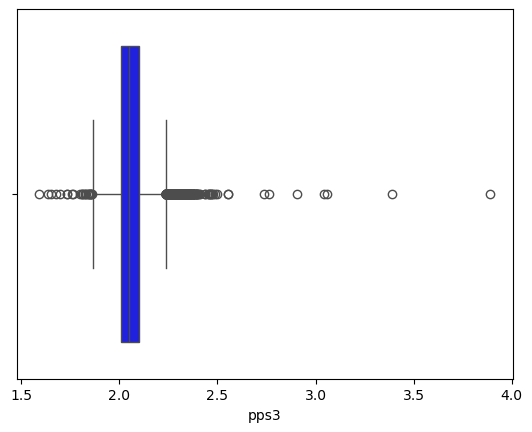

In [55]:
sns.boxplot(x = df.pps3,color = "blue")

In [57]:
upper_limit = df['pps3'].mean()+3*df['pps3'].std()
lower_limit = df['pps3'].mean()-3*df['pps3'].std()
print(upper_limit)
print(lower_limit)

2.324207905895481
1.8015907502173918


In [59]:
df.loc[( df['pps3'] >upper_limit) |  (df['pps3'] <lower_limit)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft,pps1,pps2,pps3
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274,33.102832,5.753506,2.398647
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333,32.182872,5.672995,2.381805
190,Bellandur,4 Bedroom,1200.0,5.0,325.0,4,27083,30.030709,5.480028,2.340946
345,other,3 Bedroom,11.0,3.0,74.0,3,672727,87.621958,9.360660,3.059520
665,Yelahanka,3 BHK,35000.0,3.0,130.0,3,371,7.185516,2.680581,1.637248
...,...,...,...,...,...,...,...,...,...,...
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000,32.710663,5.719324,2.391511
13094,other,4 Bedroom,1200.0,5.0,325.0,4,27083,30.030709,5.480028,2.340946
13127,other,4 Bedroom,1200.0,5.0,325.0,4,27083,30.030709,5.480028,2.340946
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000,35.303483,5.941673,2.437555


In [61]:
new_df1 = df.loc[( df['pps3'] <upper_limit) |  (df['pps3'] >lower_limit)]
len(new_df1)
len(df.loc[( df['pps3'] >upper_limit) |  (df['pps3'] <lower_limit)])

129

In [63]:
len(new_df1)

13200

In [65]:
new_df = df.copy()






In [71]:

new_df.loc[df['pps3'] >upper_limit, 'pps3'] = upper_limit
new_df.loc[df['pps3'] <lower_limit, 'pps3'] = lower_limit

<Axes: xlabel='pps3'>

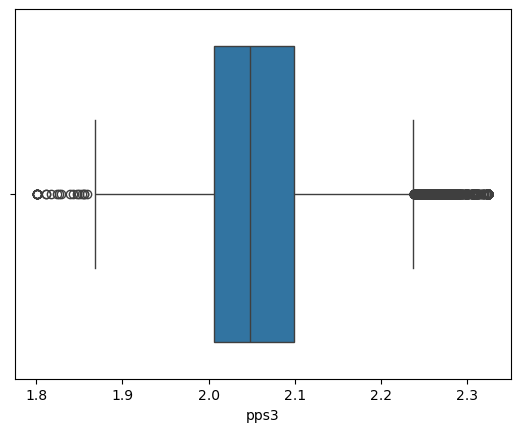

In [75]:
sns.boxplot(x = new_df['pps3'])

In [1]:
from scipy.stats import skew,kurtosis

In [9]:
df.price_per_sqft.skew()

108.28105529705168

In [99]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [11]:
df.price_per_sqft.kurtosis()

12095.21502832288

In [11]:
df.price_per_sqft.kurtosis()

12095.21502832288

In [17]:
import numpy as np
df['pps1']=np.cbrt(df.price_per_sqft)

In [19]:
df['pps1'].skew()

15.55736954267158

In [21]:
df['pps2'] = np.sqrt(df['pps1'])

In [23]:
df['pps2'].skew()

3.816510779829867

C:\Users\Windows 11\AppData\Local\Temp\ipykernel_8032\2567780463.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['pps3'],bins = 100,kde = True)


<Axes: xlabel='pps3', ylabel='Density'>

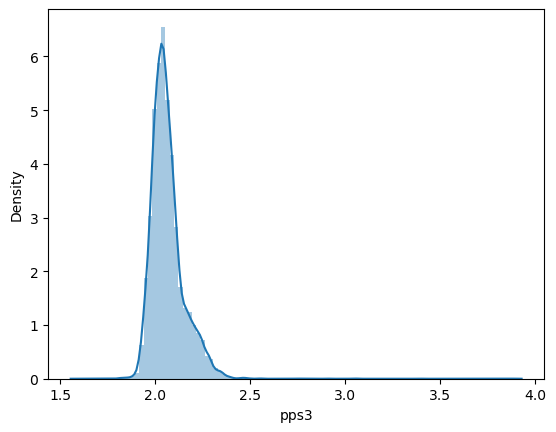

In [45]:
sns.distplot(df['pps3'],bins = 100,kde = True)

C:\Users\Windows 11\AppData\Local\Temp\ipykernel_8032\2792960981.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'],bins = 100,kde = True)


<Axes: xlabel='price_per_sqft', ylabel='Density'>

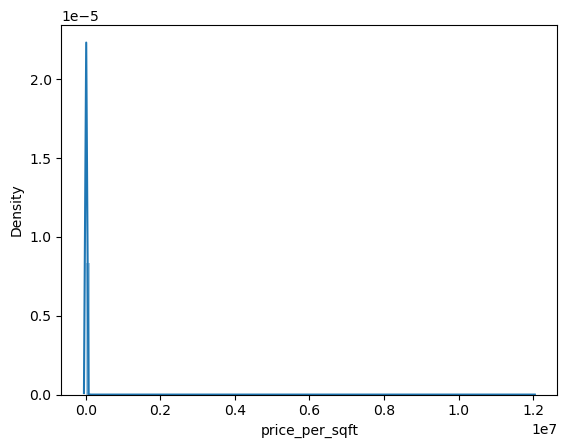

In [27]:
sns.distplot(df['price_per_sqft'],bins = 100,kde = True)

In [39]:
df['pps2'].value_counts()

pps2
4.135186    148
3.984220    139
3.896530    109
4.641589     77
4.201398     74
           ... 
4.045404      1
4.962393      1
4.458429      1
4.672029      1
4.672553      1
Name: count, Length: 4951, dtype: int64

In [41]:
df['pps3'] = np.sqrt(df['pps2'])

In [43]:
df['pps3'].skew()

2.1846612536780503

<Axes: xlabel='pps2'>

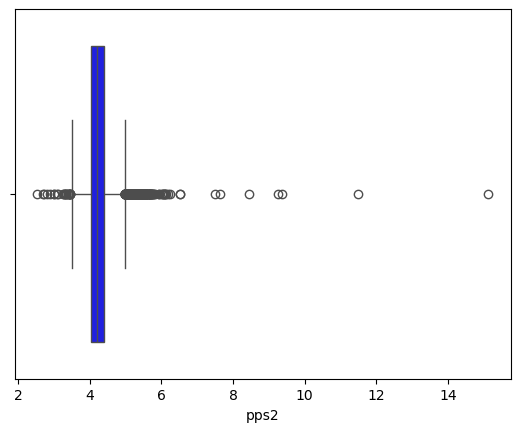

In [47]:
sns.boxplot(x = df.pps2,color = "blue")

In [53]:
upper_limit = df['pps3'].mean()+3*df['pps3'].std()
lower_limit = df['pps3'].mean()-3*df['pps3'].std()
print(upper_limit)
print(lower_limit)

2.324207905895481
1.8015907502173918


<Axes: xlabel='pps3'>

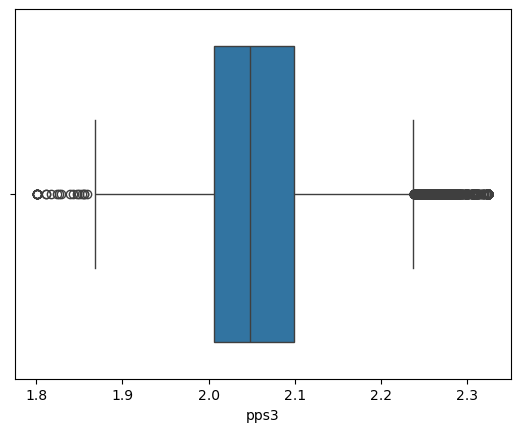

In [77]:
sns.boxplot(x = new_df['pps3'])

In [83]:
q1 = df['pps3'].quantile(0.2)
q2 = df['pps3'].quantile(0.21)
iqr = q2-q1
q1,q2,iqr

(1.9968395377192505, 1.9995110618690684, 0.002671524149817861)

In [93]:
upper_limit = q2+(1.5*iqr)
lower_limit = q1 -(1.5*iqr)
upper_limit,lower_limit

(2.0035183480937953, 1.9928322514945238)

In [123]:
new_df1 = df.loc[( df['pps3'] <upper_limit) &  (df['pps3'] >lower_limit)]
print('outliers:',len(df)-len(new_df1))

outliers: 12445


In [125]:
len(df)

13200

In [129]:
len(new_df1)

755

In [131]:
new_df1.loc[df['pps3'] <upper_limit, 'pps3'] = upper_limit
new_df1.loc[df['pps3'] >lower_limit, 'pps3'] = lower_limit

In [ ]:
sns.boxplot(x=new_df1['pps3'])

<Axes: xlabel='pps3'>

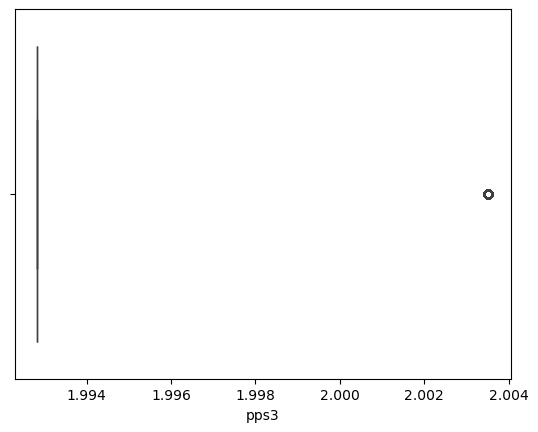

In [95]:
df.loc[( df['pps3'] >upper_limit) |  (df['pps3'] <lower_limit)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft,pps1,pps2,pps3
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,15.465410,3.932609,1.983081
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,16.649093,4.080330,2.019983
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,16.267634,4.033315,2.008312
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,18.415244,4.291299,2.071545
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,16.198059,4.024681,2.006161
...,...,...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,18.841714,4.340704,2.083436
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,22.314357,4.723807,2.173432
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,17.388957,4.170007,2.042059
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407,21.832754,4.672553,2.161609


In [113]:
new_df.loc[df['pps3'] <upper_limit, 'pps3'] = upper_limit
new_df.loc[df['pps3'] >lower_limit, 'pps3'] = lower_limit

<Axes: xlabel='pps3'>

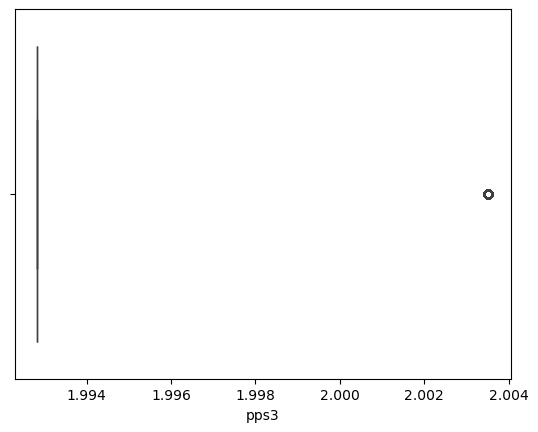

In [115]:
sns.boxplot(x = new_df['pps3'])

In [105]:
new_df1 = df.loc[( df['pps3'] <upper_limit) |  (df['pps3'] >lower_limit)]
len(new_df1)
len(df.loc[( df['pps3'] >upper_limit) |  (df['pps3'] <lower_limit)])

12445

In [107]:
len(new_df1)

13200

In [109]:
len(df.loc[( df['pps3'] >upper_limit) |  (df['pps3'] <lower_limit)])

12445

<Axes: xlabel='pps3'>

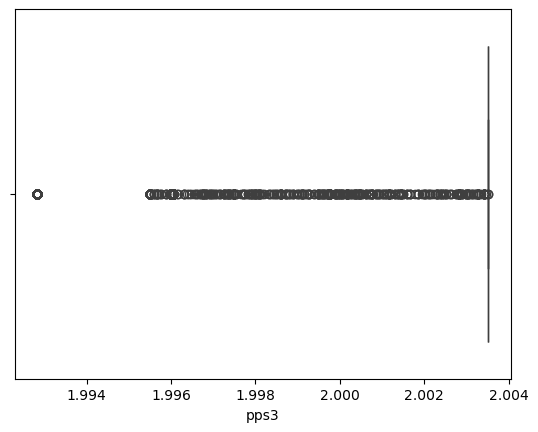

In [111]:
sns.boxplot(x = new_df['pps3'])